# Keras를 사용한 인공 신경망


In [6]:
# Load dataset
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris.target == 0).astype(np.int)

/var/folders/10/9_p98m6j42n84y4wmf_k0krc0000gn/T/ipykernel_70587/333892422.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


## 인공 신경망(Artificial Neural Network, ANN)


인공 신경말이란 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델이다.

1. 1957년 퍼셉트론 탄생

2. 1969년: 첫번째 딥러닝 겨울: 퍼셉트론은 XOR 문제를 풀 수 없음을 수학적으로 증명하여 퍼셉트론의 한계 증명

3. 1974년: 폴 웨어보스, 역전파 알고리즘 발표

4. 1986년: 제프리 한튼, 역전파 알고리즘을 이용한 다층 퍼셉트론으로 숫자 인식 문제 해결

5. 1988년: 얀 르쿤 CNN 발표

6. ~2000년: 두번째 딥러닝 겨울: 기울기 소실 문제 등으로 딥러닝 연구가 중단

7. 현재까지: ReLU, 가중치 초기화 방법 개선, 등의 방법을 통해 기울기 소실 문제 해결 및 딥러닝 연구 활발

<br>

현재 인공 신경망이 부흥할 수 있었던 배경에는

- 컴퓨터 성능 개선

- 대량의 데이터

- 알고리즘 개선

등이 있다.


## 단층 퍼셉트론


### 퍼셉트론이란


퍼셉트론이란 가장 단순한 인공 신경망 구조로 1957년 파랑크 로젠블라트가 제안하였다.

모든 입력은 가중치와 연결되며 헤비사이드 계단 함수를 사용했기에 TLU(Threshold Logic Unit)이라고도 한다.

모든 입력값의 선형 조합을 계산한 다음 활성함수인 계산함수를 적용하여 양성/음성을 분류하는 것이기에 작동은 로지스틱 회귀 또는 선형 SVM 분류기와 유사하다.


### 퍼셉트론 학습 알고리즘


퍼셉트론 학습 알고리즘은 경사하강법의 기본 아이디어와 매우 유사하다.

하나의 샘플이 입력될 때 마다 예측한 후에 오차를 계산하여 오차가 줄어드는 방향으로 가중치를 조절한다.

수식으로 아래와 같다.

$$w_{i,j}^{(next step)} = w_{i,j} + \eta(y_j - \hat{y}_j)x_i$$


### 퍼셉트론의 선형성


임곗값 기준의 계단함수를 활성함수로 사용하였기에 퍼셉트론의 각 출력 뉴런의 결정경계는 선형이다.

따라서 퍼셉트론은 선형적으로 구분될 수 있는 데이터셋에 대해서만 작동한다. 복잡한 패턴은 학습하지 못한다.


### Code


sklearn의 Perceptron을 사용하여 선형 분류를 수행할 수 있다.


In [5]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000,    # 반복 횟수
                     tol=1e-3,         # 반복 중단 시점 (loss가 tol보다 작아지면 중단)
                     random_state=42)
per_clf.fit(X, y)

per_clf.predict([[2, 0.5]])[0]

1

아래와 같이 시각화하였을 때 선형적으로 분류됨을 확인할 수 있다.

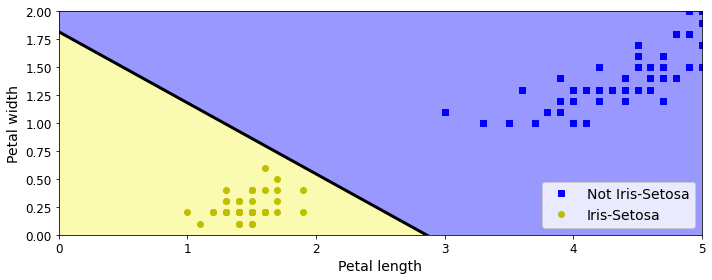


### Code: 활성화 함수에 따른 XOR 문제 해결


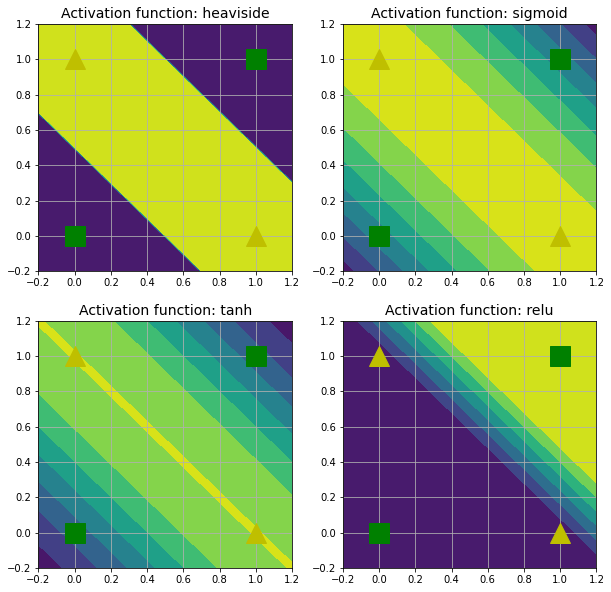

In [14]:
def relu(z): return np.maximum(0, z)
def sigmoid(z): return 1 / (1 + np.exp(-z))
def heaviside(z): return (z >= 0).astype(z.dtype)


def derivative(z): return (np.sign(z + 0.000001) -
                           np.sign(z - 0.000001))/(2 * 0.000001)


def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)


x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

plt.figure(figsize=(10, 10))
for index, activation_function in enumerate((heaviside, sigmoid, np.tanh, relu)):
    plt.subplot(221 + index)
    plt.contourf(x1, x2, mlp_xor(x1, x2, activation=activation_function))
    plt.plot([0, 1], [0, 1], "gs", markersize=20)
    plt.plot([0, 1], [1, 0], "y^", markersize=20)
    plt.title(
        f"Activation function: {activation_function.__name__}", fontsize=14)
    plt.grid(True)

## 다층 퍼셉트론(MLP)


퍼셉트론을 여러 개 쌓아올린 인경신경망을 다층 퍼셉트론(MultiLayer Perceptron, MLP)라고 한다.

하나의 입력층, 하나 이상의 TLU층과 하나의 출력층으로 구성된다.

모든 층은 편향을 포함하여, 다음 층과 완전히 연결되어 있기에 완전 연결층(Fully Connected Layer)라고 한다.

완전 연결층에서 이루어지는 연산은 행렬 수식으로 표현 가능하며 다음과 같다.

$$ h\_{W,b}(X) = \phi(XW + b) $$


### 역전파 알고리즘


다층 퍼셉트론은 층이 많을 수록 훈련시키는 과정이 점점 더 어려워진다.

또한 경사하강법을 수행하기 위해 미분을 수행하는 것은 시간이 많이 소모된다.

이에 역전파 알고리즘(backpropagation algorithm)이 등장하게 된다.

역전파 알고리즘은 미적분의 연쇄법칙(chain rule)이 적용하여 각 연결 가중치가 오차에 기여한 정도를 측정하고 이를 토대로 경사 하강법 단계에서 경사 하강법을 적용한다. 이에 아래 과정을 반복하며 빠르고 효율적으로 최적의 가중치를 찾아낸다.

1. 순방향 계산(forward)를 통해 예측값과 오차값을 계산한다.

2. 역전파 계산(backward)을 통해 각 연결 가중치가 오차에 기여한 정도를 측정한다.

3. 가중치 조정(weight update)을 통해 오차를 줄이는 방향으로 가중치를 조정한다.

<br>

MLP는 backpropagation을 통해 학습 속도를 획기적으로 높일 수 있었으나 여전히 선형 분류기에 의존하고 있다는 한계점을 지닌다.


## 심층신경망(DNN)


2개 이상의 은닉층을 가지는 MLP를 심층신경망(deep neural network, DNN)라고 한다.

MLP와 명확하게 구분하지는 않으나 활성함수로 비선형 함수를 사용하는 것을 통해 MLP와 구분한다.

MLP는 계단함수를 통해 항상 선형 분류기를 사용하였다면, DNN은 sigmoid, relu, hiperbolic tangent와 같은 비선형 함수를 통해 비선형 분류기를 사용한다.

> 선형 변환은 층을 아무리 많이 쌓아도 하나의 레이어의 가중치를 조정해 동일한 효과를 낼 수 있기에 복잡한 문제 해결을 할 수 없다는 한계가 있다.


### DNN 회귀


DNN을 이용한 회귀는 아래 특징을 가진다.

- 입력 벡터의 차원와 출력 벡터의 차원 수를 입력과 출력 뉴런의 수로 정한다.

- 손실함수는 주로 MSE, MAE, Huber loss를 사용한다.

> 출력 뉴런 수가 2개 이상일 경우 **다변량 회귀**라고 한다. 동시에 여러값을 예측하기 때문이다.


### DNN 분류


DNN을 이용한 분류는 아래 특징을 가진다.

- 입력 벡터의 차원와 출력 벡터의 차원 수를 입력과 출력 뉴런의 수로 정한다. 다만 많은 경우 이진 분류의 경우 출력 뉴런의 수는 1개로 한다.

- 손실함수는 주로 Cross Entropy 함수를 사용한다.


## Tensorflow & Keras


Keras는 모든 종류의 신경망을 손쉽게 만들어 주는 최상위 딥러닝 API 패키지로 본 과정에서는 tensorflow만을 지원하는 tensorflow.keras를 이용할 것이다.
